# **Tarea 2**  

## Por Thomas Martínez Velásquez

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **El problema de clasificación binario** 

En machine learnig, muchos problemas están relacionados con problemas de clasificación. El objetivo de la clasificación  es tomar un input vector $\textbf{x}$ y asignarlo en alguna clase discreta $\mathcal{C}_k$ donde $k=0, \ldots K$. En la mayoría de los escenarios las clases son tomadas disjuntas, así, cada input $\textbf{x}$ es asignada a una y solo una clase. El espacio es entonces dividido en **espacios de decisión** cuyas fronteras son llamadas **fronteras de decisión** o  **superficies de decisión**. En esta ocasión  vamos a considerar un problema simple de clasificación binario  en el cual queremos que la superficie de decisión sean una linea recta.    


Supongamos entonces que tenemos un conjunto de puntos en $\mathbb{R}^2$, denotado por 
$\mathcal{D}$. Cada punto en $\mathcal{D}$ tiene una etiqueta que lo clasifica en una de dos clases: 
\begin{align*}
&0 : \text{ clase 0} \quad \mathcal{C}_0
\qquad \qquad
1 : \ \text{ clase 1} \quad \mathcal{C}_1
\end{align*}                  
Donde cada punto en $\mathcal{D}$ y cada clase del punto o etiqueta vienen de alguna distribución desconocida de probabilidad 
conjunta $p(\textbf{x}, \mathcal{C})$, es decir, $p(\textbf{x}, \mathcal{C})$ es la probabilidad de que un cierto punto $\textbf{x}$ sea de alguna clase $\mathcal{C}\in \lbrace 0, 1\rbrace$.


Ahora supongamos que queremos encontrar un modelo $g$ que nos ayude a predecir que, dado un 
punto nuevo $\textbf{x}$ dado por la distribución $p(\textbf{x}, \mathcal{C})$, cual sería su etiqueta o clase mas probable. Para esto, la idea es entrenar a $g$ con el conjunto de datos 
$\mathcal{D}$ que ya tenemos. De esta manera, buscamos que $g$ aprenda patrones y características relevantes de los datos existentes, lo que nos permitirá clasificar de manera óptima cualquier dato nuevo que se presente.


Supongamos que $\mathcal{D}$ esta dado por

In [2]:
D = [([8.516261913805081, 5.079706893674858], 1), ([4.138099674144254, 4.40691885821491], 0), ([8.714039813926117, 2.792872966287856], 1), ([5.26313092244498, 4.971067709658649], 0), ([6.699045640661805, 0.4288360461249061], 1), ([8.282908012901364, 3.161578885974009], 1), ([5.237277125417567, 5.437469482444474], 0), ([7.5210160505490045, 4.01915422048079], 1), ([4.88387235736912, 5.869257447568183], 0), ([10.214051115292131, 0.5396327638813307], 1), ([11.879887019364846, 0.27739657528685324], 1), ([11.382260392693434, 4.577840073178455], 1), ([5.539805161603695, 1.7231517404279901], 1), ([9.712719627283297, 0.5621961089747605], 1), ([11.632933864491381, 3.6041328876033765], 1), ([8.9446365708195, 3.3220610422864905], 1), ([6.5211198552511, 4.827776254915828], 0), ([5.2068839191267715, 5.838103546519826], 0), ([3.9803869392593283, 4.534667486304619], 0), ([9.74424281017519, -0.2753374198535159], 1), ([9.497218010419989, 3.394629199039556], 1), ([8.506341072819048, 5.701824352948936], 0), ([4.79085382387758, 4.7361916566803695], 0), ([9.979705542884872, 3.265543745989466], 1), ([2.827796353885136, 1.6535274887521187], 0), ([2.6318645959101628, 6.838476765008236], 0), ([9.03994614459259, 2.3127625495737973], 1), ([9.21388205360695, 2.5001977940795532], 1), ([4.900674704345226, 7.290087614529629], 0), ([6.253970993938549, 6.135806346485856], 0), ([10.160085325316318, 3.2128265461180887], 1), ([8.472893473803936, 3.604272000450435], 1), ([9.41414894906101, 4.046686237393109], 1), ([7.744444204644826, 2.3494482605946487], 1), ([11.341491720050916, 3.8713172572461234], 1), ([6.623982130991724, 3.050855697094076], 1), ([4.82806213938845, 2.4570718103345905], 0), ([7.41332386427222, 3.182483900454079], 0), ([9.37151534859901, 3.4870348690344994], 1), ([11.971702906582912, 3.6338385419928723], 1)]


Donde $\mathcal{D}$ ha sido generada con la librería de python `random`

In [3]:
N = len(D)
N

40

Notemos que $\mathcal{D}$ es un arreglo de 40 elementos de la forma

\begin{align*}
\mathcal{D}
=
\left\lbrace 
\left( 
\textbf{x}_1, t_1
\right) 
,
\left( 
\textbf{x}_2, t_2
\right)
,\ldots,
\left( 
\textbf{x}_N, t_N
\right)
\right\rbrace 
\end{align*}

Donde $N=40$, $\textbf{x}_i\in\mathbb{R}^d$ con $d = 2$ y $t_i\in \lbrace 0,1 \rbrace$ es la clase a la cual pertenece cada punto $\textbf{x}_i$

Grafiquemos los puntos en $\mathcal{D}$

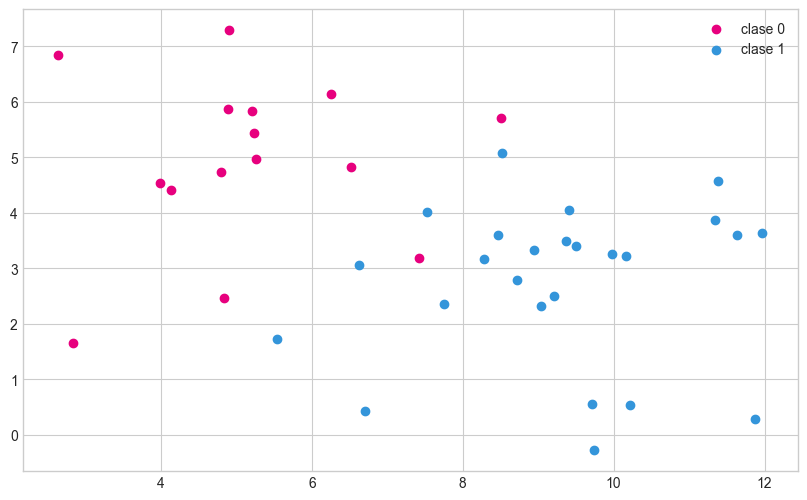

In [4]:
coor_x0 = []
coor_y0 = []

coor_x1 = []
coor_y1 = []

for i in D:
    if i[1] == 0:
        coor_x0.append(i[0][0])
        coor_y0.append(i[0][1])
    else:
        coor_x1.append(i[0][0])
        coor_y1.append(i[0][1])



"""
Gráfica 1

"""
def plot_grafica1(coor_x0, coor_y0, coor_x1, coor_y1):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes()

    ax.scatter(coor_x0, coor_y0, marker='o', color='#E7007E', label='clase 0')
    ax.scatter(coor_x1, coor_y1, marker='o', color='#3495DA', label='clase 1')

    plt.legend()
    plt.show()


plot_grafica1(coor_x0, coor_y0, coor_x1, coor_y1)

Donde los puntos rosados son de la **clase 0** y los puntos azules son de la **clase 1**

¿ Pero como podemos encontrar el modelo $g$ que nos ayude a clasificar si un nuevo input $\textbf{x}$ es de **clase 0** o es de **clase 1** ? Para esto, vamos a tomar un punto de vista probabilistico  haciendo suposiciones simples de la distribución de los datos.  Adoptaremos un enfoque generativo en el que modelamos las densidades condicionales de clase   $p(\textbf{x}|\mathcal{C}_k)$, así como las clases previas $p(\mathcal{C}_k)$, y luego las usaremos para calcular probabilidades posteriores $p(\mathcal{C}_k|\textbf{x})$ a través de teorema de Bayes, la cual usaremos para definir nuestro modelo $g$. Con esto en mente, entonces definamos a $g$ como:

\begin{align*}
g \hspace{0.1 cm} : \hspace{0.1 cm} \mathbb{R}^d \rightarrow \lbrace 0 , 1\rbrace \qquad \qquad (d=2)
\end{align*}
tal que
\begin{align*}
g(\textbf{x}) =
\left\{ \begin{array}{lcc} 
1 & \text{si} &  p(\mathcal{C}_0|\textbf{x}) \leq 0.5 
\\ \\ 
0 & \text{si} & p(\mathcal{C}_0|\textbf{x}) > 0.5 
\end{array} \right.
\end{align*}

Es decir, si $g(\textbf{x}) = 0$ entonces $g$ clasifica a $\textbf{x}$ como **clase 0** y si $g(\textbf{x}) = 1$ entonces lo clasifica como **clase 1**. Intuitivamente nuestro modelo $g$ funciona de la siguiente manera; dado un $\textbf{x}$,
si este es muy probable que sea de **clase 0** (más del 50 %) entonces se clasifica como 
**clase 0**, de lo contrario, si es poco probable que sea de **clase 0** (menor al 50 %) entonces se clasifica 
como **clase 1**

Por lo tanto, si queremos encontrar $g$ entonces tenemos que encontrar alguna expresión para la probabilidad condicional $p(\mathcal{C}_0|\textbf{x})$. Así, por el teorema de Bayes tenemos que

\begin{align*}
p(\mathcal{C}_0|\textbf{x})
&=
\dfrac{
p(\textbf{x}|\mathcal{C}_0) p(\mathcal{C}_0)
}{
p(\textbf{x})
}
\\
\\
&=
\dfrac{
p(\textbf{x}|\mathcal{C}_0) p(\mathcal{C}_0)
}{
p(\textbf{x},\mathcal{C}_0 ) + p(\textbf{x},\mathcal{C}_1 )
}
\\
\\
&=
\dfrac{
p(\textbf{x}|\mathcal{C}_0) p(\mathcal{C}_0)
}{
p(\textbf{x}|\mathcal{C}_0 )p(\mathcal{C}_0) + p(\textbf{x}|\mathcal{C}_1 )p(\mathcal{C}_1)
}
\\
\\
&=
\dfrac{
1
}{
1 + 
\dfrac{p(\textbf{x}|\mathcal{C}_1 )p(\mathcal{C}_1)}
{p(\textbf{x}|\mathcal{C}_0 )p(\mathcal{C}_0)}
}
\\
\\
&=
\dfrac{
1
}{
1 + 
\text{exp}\left( 
-\text{ln}
\left[ 
\dfrac{p(\textbf{x}|\mathcal{C}_0 )p(\mathcal{C}_0)}
{p(\textbf{x}|\mathcal{C}_1 )p(\mathcal{C}_1)}
\right] 
\right) 
}
\\
\\
&=
\dfrac{1}{1 + \text{exp}(-a(\textbf{x}))}
\\
\\
&=
\sigma(a(\textbf{x}))
\end{align*}

Donde $a(\textbf{x})$ es el logaritmo natural del cociente de probabilidades en la antepenultima igualdad. En principio, $a(\textbf{x})$ es desconocido puesto que nosotros no conocemos la distribución de los datos $p(\textbf{x},\mathcal{C})$, sin embargo, hagamos la suposición de 
que $a(\textbf{x})$ es alguna función lo mas simple posible, es decir supongamos que 

\begin{align*}
a(\textbf{x})  = w_0 + w_1 x_1 \ldots + w_d x_d = \textbf{x}^t\textbf{w}
\end{align*}

Donde aquí estamos haciendo un abuso de notación y estamos expresando los vectores
 
\begin{align*}
\textbf{x} 
=
\begin{bmatrix}
x_1 \\
\vdots
\\
x_d
\end{bmatrix}
\in\mathbb{R}^{d}
\qquad
\qquad
\textbf{x} 
=
\begin{bmatrix}
1 \\
x_1 \\
\vdots
\\
x_d
\end{bmatrix}
\in\mathbb{R}^{d+1}
\qquad
\qquad
(d=2)
\end{align*}

de forma indistinta. Por lo tanto notemos que la probabilidad 

\begin{align*}
 p(\mathcal{C}_0|\textbf{x}) = \sigma(\textbf{x}^t\textbf{w})
\end{align*}

es también una función que detpende de los parámetros $\textbf{w}\in\mathbb{R}^{d+1}$. Por lo tanto, nuestro objetivo ahora es encontrar el mejor parámetro $\textbf{w}$ que haga más probable que las etiquetas de los datos $\textbf{x}$  en $\mathcal{D}$ vengan de la distribución 
$ p(\mathcal{C}_0|\textbf{x})$ 

Para esto, consideremos el vector de error $\textbf{r}(\textbf{w})$, en la que en cada entrada del vector 
es la diferencia entre la etiqueta real $t_i$ del punto $\textbf{x}_i$ en $\mathcal{D}$, y la predicción del valor de la etiqueta del punto $\textbf{x}_i$ dada por la probabilidad 
$p(\mathcal{C}_0|\textbf{x}_i) = \sigma(\textbf{x}_i^t\textbf{w})$.

\begin{align*}
\textbf{r}(\textbf{w})
=
\begin{bmatrix}
t_1 - \sigma(\textbf{x}_1^t\textbf{w}) \\
\vdots
\\
t_N - \sigma(\textbf{x}_N^t\textbf{w})
\end{bmatrix}
\qquad
\qquad 
(N=40)
\end{align*}
Donde
\begin{align*}
\textbf{r} \hspace{0.1 cm} : \hspace{0.1 cm} \mathbb{R}^{d+1} \rightarrow \mathbb{R}^N
\qquad
\qquad
(d=2)
\end{align*}
Y donde además hemos cometido el mismo abuso de notación mencionado anteriormente.



Ahora bien, notemos que el vector $\textbf{r}$ es el vector que mide en cada componente cuanto
es el error de la predicción con respecto al dato real que conocemos en $\mathcal{D}$, por lo tanto,
nuestro objetivo ahora es minimizar lo mas posible ese error. Una forma de hacer esto es minimizar la norma al cuadrado de $\textbf{r}$, por lo tanto si definimos la función 

\begin{align*}
f(\textbf{w}) = \dfrac{1}{2} \left\Vert \textbf{r}(\textbf{w}) \right\Vert^2
\end{align*}

Nuestro objetivo ahora será solucionar el problema 

\begin{align*}
\underset{\textbf{w}\in\mathbb{R}^{d+1}}{\text{arg min}} \hspace{0.1 cm} f(\textbf{w})
\end{align*}

Denotemos por $\textbf{w}^*$ alguna solución de este problema

Para cada $\textbf{x}_i$ en $\mathcal{D}$ consideremos el siguiente abuso de notación

\begin{align*}
\textbf{x}_i
=
\begin{bmatrix}
x_{1i} \\
\vdots \\
x_{di}
\end{bmatrix} \in\mathbb{R}^d
\qquad 
\qquad
\textbf{x}_i
=
\begin{bmatrix}
1 \\
x_{1i} \\
\vdots \\
x_{di}
\end{bmatrix} \in\mathbb{R}^{d+1}
\end{align*}

Definamos la matriz $X$  cuyas columnas son los vectores $\textbf{x}_i$ de $\mathcal{D}$ adicionando un uno en la posición cero

\begin{align*}
X
=
\begin{bmatrix}
\textbf{x}_1 & \cdots & \textbf{x}_N
\end{bmatrix}
=
\begin{bmatrix}
1 & \cdots & 1 \\
x_{11} & \cdots & x_{1N} \\
\vdots & \ddots & \vdots \\
x_{d1} & \ldots & x_{dN}
\end{bmatrix}
\qquad
\qquad
X\in\mathbb{R}^{(d+1)\times N}
\end{align*}

Con $d=2$, $N=40$ 

En python, $X$ va ha estar dada por `matriz_X`

In [5]:
matriz_X = np.array(
    [[1, D[i][0][0], D[i][0][1]] for i in range(N)]
).T

etiquetas_t = [D[i][1] for i in range(N)]

Y  `etiquetas_t` es un arreglo que contiene las etiquetas o las clases de los puntos en $\mathcal{D}$ 

Y definamos en python a la función 

\begin{align*}
\sigma(a) 
=
\dfrac{1}{1 + \text{exp}(-a)}
\end{align*} 

como `sig` 

In [6]:
def sig(a):
    return 1 / (1 + np.exp(-a))

Y con lo anterior, definamos en python a las funciones $\textbf{r}$ y $f$
como `r`  y  `f`  respectivamente 

In [7]:
def r(w):
    return np.array(
        [etiquetas_t[i] - sig(matriz_X[:, i]@w) for i in range(N)]
    )

def f(w):
    return 0.5*(np.linalg.norm(r(w)))**2

Sean 

\begin{align*}
f \hspace{0.1 cm} : \hspace{0.1 cm} \Omega\subseteq\mathbb{R}^n \rightarrow \mathbb{R}
\qquad\qquad
\textbf{F} \hspace{0.1 cm} : \hspace{0.1 cm} \Omega\subseteq\mathbb{R}^n \rightarrow \mathbb{R}^m
\end{align*} 

Vamos a denotar el jacobiano de $\textbf{F}(\textbf{x})$ como

\begin{align*}
D_\textbf{F} (\textbf{x})
\end{align*}

y la matriz Hessiana de $f(\textbf{x})$ como

\begin{align*}
\nabla^2 f(\textbf{x})
\end{align*}

### **Método Gauss-Newton** 

En el método de Gauss-Newton la dirección de descenso $\textbf{p}$ está dada por la solución de

\begin{align*}
D_\textbf{r}^t(\textbf{w}) D_\textbf{r}(\textbf{w}) \textbf{p} 
=
-D_\textbf{r}^t(\textbf{w}) \textbf{r}(\textbf{w})
\end{align*}

con respecto a $\textbf{p}$. Por lo tanto para encontrar a $\textbf{p}$
primero enfoquemonos en computar $D_\textbf{r}(\textbf{w})$.


Primero empecemos por denotar la 
$i$-esima entrada del vector $\textbf{r}$ como $r_i$ y por lo tanto tenemos que

\begin{align*}
r_i(\textbf{w}) = t_i - \sigma(\textbf{x}_i^t\textbf{w})
\end{align*}


Donde $\textbf{x}_i$ es la $i$-esima columna de $X$, y como 


\begin{align*}
\dfrac{d}{da}\sigma(a)
=
\sigma(a)(1 - \sigma(a))
\end{align*}

Entonces se sigue por la regla de la cadena que

\begin{align*}
\nabla r_i (\textbf{w})
&=
-\sigma(\textbf{x}_i^t\textbf{w})
\left( 
1 - \sigma(\textbf{x}_i^t\textbf{w})
\right) 
\textbf{x}_i
\\
\\
&=
\alpha_i(\textbf{w})
\textbf{x}_i
\end{align*}

Donde $\alpha_i$ es una función que introducimos para simplificar la notación. En python esta funcion la denotaremos por `alpha` 

In [8]:
def alpha(i, w):
    return - sig(matriz_X[:,i]@w)*(1 - sig(matriz_X[:,i]@w))

Y dado que el jacobiano de $\textbf{r}$ se puede entender como la matriz en la que cada
fila es el gradiente transpuesto de $r_i$ entonces el jacobiano de $\textbf{r}$
esta dado por 

\begin{align*}
D_\textbf{r}(\textbf{w})
&=
\begin{bmatrix}
\nabla^t r_1 (\textbf{w}) \\
\vdots \\
\nabla^t r_N (\textbf{w})
\end{bmatrix}
\\
\\
&=
\begin{bmatrix}
\alpha_1(\textbf{w}) \textbf{x}_1^t \\
\vdots \\
\alpha_N(\textbf{w}) \textbf{x}_N^t
\end{bmatrix}
\\
\\
&=
\begin{bmatrix}
\alpha_1(\textbf{w}) & 0 & \cdots & 0 \\
0 & \alpha_2(\textbf{w}) & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \alpha_N(\textbf{w}) \\
\end{bmatrix}
X^t
\\
\\
&=
\Lambda (\textbf{w}) X^t
\end{align*}

Donde $\Lambda (\textbf{w}) $ es la matriz diagonal $N\times N$  que se ha introducido 
para simplificar notación. Esta matriz, en python va a estar denotada por `matriz_Lambda`

In [9]:
def matriz_Lambda(w):
    zeros = np.zeros(([N, N]))
    for i in range(N):
        zeros[i, i] = alpha(i, w)
    return zeros

Por lo tanto, la dirección de descenso $\textbf{p}$ en el método de Gauss-Newton estada dada al resolver 

\begin{align*}
(\Lambda X^t)^t \Lambda X^t\textbf{p} &= - X \Lambda  \textbf{r} 
\\
\\
X \Lambda \Lambda X^t \textbf{p} &=  - X \Lambda \textbf{r} 
\end{align*}

con respecto a $\textbf{p}$

Por otra parte, recordemos que el gradiente de $f$ está dado por

\begin{align*}
\nabla f(\textbf{w})
&=
D_\textbf{r}^t (\textbf{w}) \textbf{r} (\textbf{w})
\\
\\
&=
(\Lambda (\textbf{w}) X^t)^t \textbf{r} (\textbf{w})
\\
\\
&=
X \Lambda (\textbf{w}) \textbf{r} (\textbf{w})
\end{align*}

En python $\nabla f$ va a estar dado por `grad_f` 

In [10]:
def grad_f(w):
    return (matriz_X@matriz_Lambda(w))@r(w)

Por lo tanto la implementación del método de Gauss-Newton en python va a estar dada por la función definida como `gauss_newton_method` 

In [11]:
GN_matriz = []
def flatten(x):
    a = []
    for i in x:
        if isinstance(i, np.ndarray) == False:
            a.append(i)
        else:
            for j in i:
                a.append(j)
    return a


"""
w_inicial es el punto inicial 
alpha_hat es el tamaño del learnig rate
epsilon es un criterio de parada del ciclo while

"""
def gauss_newton_method(w_inicial, alpha_hat, epsilon):
    global GN_matriz

    wk = w_inicial
    gk = grad_f(wk)
    norm_gk = np.linalg.norm(gk)

    row = flatten([wk, norm_gk, f(wk)])
    GN_matriz.append(row)

    while  norm_gk > epsilon:
        pk = np.linalg.solve(
            (matriz_X@matriz_Lambda(wk)@matriz_Lambda(wk)@matriz_X.T), -(matriz_X@matriz_Lambda(wk))@r(wk)
        )
        wk = wk + alpha_hat*pk
        gk = grad_f(wk)
        norm_gk = np.linalg.norm(gk)

        row = flatten([wk, norm_gk, f(wk)])
        GN_matriz.append(row)
    return wk

In [12]:
cero = np.array([0, 0, 0])


Por lo tanto, la solución $\textbf{w}^*$ de nuestro problema de optimización utilizando el método de Gauss-Newton la denotarmos como `w_GN` 

In [13]:
w_GN = gauss_newton_method(w_inicial=cero, alpha_hat=1, epsilon=0.0001)
print(w_GN) 

[-67.11869852  20.20458869 -19.45689309]


Donde en lo anterior para conseguir a `w_GN` hemos empezado a iterar desde el vector 
$\textbf{0}$ y con un learning rate de 1 hasta que el gradiente de $f$ en algún punto de la iteración sea menor a `epsilon=0.0001`

Es más, podemos notar que `w_GN`  es una buena aproximación a algún punto estacionario de $f$ dado que la norma de la gradiente de $f$ dado por 

In [14]:
np.linalg.norm(grad_f(w_GN))

2.3471563621577445e-05

Es muy cercana a cero.

En la siguiente tabla, cada fila es una iteración del método de Gauss-Newton con punto inicial 
cero, learning rate 1 y parámetro `epsilon=0.0001`, y cada columna son los valores $w_0$, $w_1$ y
$w_2$ del vector $\textbf{w}$, el valor de la norma de $\nabla f$, y el valor de $f$ en cada iteración del 
método. 

In [15]:
GN_matriz = np.array(GN_matriz )
Dataf_1 = pd.DataFrame(GN_matriz, columns=['w0', 'w1', 'w2', 'norma de gradiente de f', 'valor de f'])
Dataf_1

,w0,w1,w2,norma de gradiente de f,valor de f
0,0.000000,0.000000,0.000000,19.330896,5.000000
1,-2.057640,0.493138,-0.351581,3.334661,1.409352
2,-2.823423,0.863934,-0.813527,0.618511,0.860048
3,-4.014137,1.337122,-1.375656,0.406660,0.715682
4,-5.884710,1.957235,-2.011603,0.427025,0.657883
5,-8.412569,2.795846,-2.856037,0.308414,0.608697
6,-12.614348,4.207410,-4.306054,0.181877,0.553453
7,-19.814785,6.551977,-6.676711,0.054070,0.514275
8,-31.029765,9.859119,-9.818480,0.008911,0.502236
9,-43.341605,13.368851,-13.075389,0.001263,0.500305


Donde en la anterior tabla podemos ver que el valor de la función $f$ va disminuyendo 
y el valor de la norma de $\nabla f$ va convergiendo a cero en cada iteració. Por tanto podemos argumentar que el punto  `w_GN`  podria ser un mínimo local.
Notemos que para encontrar este mínimo local solo fue necesario 11 iteraciones del método.


Ahora bien, recordemos que nuestra función $g$ está relacionada con la probabilidad
$p(\mathcal{C}_0|\textbf{x}) = \sigma (\textbf{x}^t\textbf{w})$, que depende de $\textbf{w}$, donde con el método de Gauss-Newton hemos encontrado el mejor parámetro $\textbf{w}^*$
que hace mas probable que los datos de las etiquetas en $\mathcal{D}$ vengan de la distribución 
$p(\mathcal{C}_0|\textbf{x})$, por tanto, la función $g$ en python va ha estar dada por
`g` 


In [16]:
def g(w, x):
    z = np.array([1, x[0], x[1]])
    p = sig(z@w)
    if p <= 0.5:
        return 1
    else:
        return 0

Donde notemos que `g` depende tanto del vector $\textbf{x}\in\mathbb{R}^d$ como del parámetro  $\textbf{w}\in\mathbb{R}^{d+1}$. Hagamos la gráfica de como clasificaría $g$ los puntos del espacio si $g$ estuviera  evaluada en el mejor parámetro $\textbf{w}^*$ Es decir en el parámetro `w_GN`


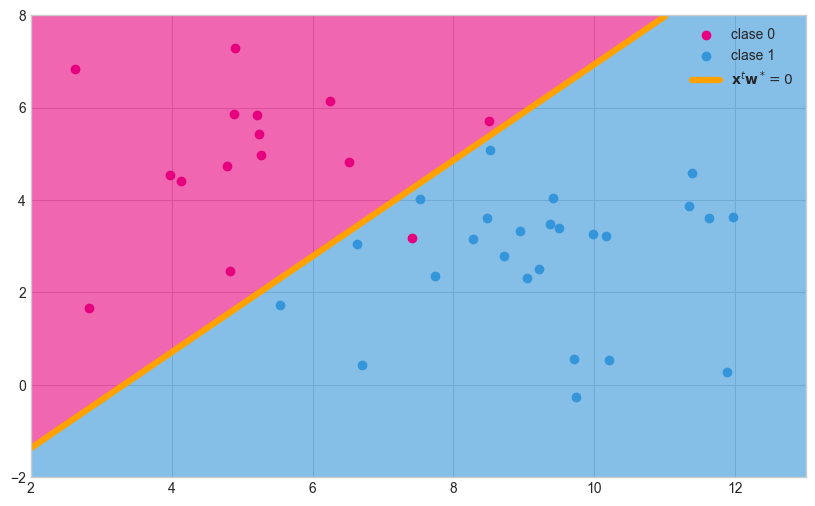

In [17]:
"""
Grafica 2

"""
def plot_grafica2(coor_x0, coor_y0, coor_x1, coor_y1, w):

    n = 200
    x = np.linspace(2, 13, n)
    y = np.linspace(-2, 8, n)
    z = np.zeros(([n, n]))

    for i in range(n):
        for j in range(n):
            p = np.array([x[i], y[j]])
            z[j, i] = g(w, p)
    
    X = np.linspace(2, 11, 50)
    Y = (-w[1]/w[2])*X + (-w[0]/w[2]) 

    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes()

    ax.contourf(x, y, z, levels=[0, 0.5, 1], colors=['#3495DA', '#E7007E'], extend='both', alpha=0.6)
    
    ax.scatter(coor_x0, coor_y0, marker='o', color='#E7007E', label='clase 0')
    ax.scatter(coor_x1, coor_y1, marker='o', color='#3495DA', label='clase 1')

    ax.plot(X, Y, '-', color='#FFA200', linewidth=4.5, label=r'$\mathbf{x}^t\mathbf{w}^*=0$')

    plt.legend()
    plt.show()

plot_grafica2(coor_x0, coor_y0, coor_x1, coor_y1, w_GN)

### **Método de región de confianza**

El método de región de confianza depende en gran medida de la matriz $B_k$. En cada iteración 
$k$, se tiene que $B_k$ es definida positiva. Para este problema, vamos a elegir a $B_k$
como la matriz Hessiana de $f$. 

Sabemos que la Hessia de $f$ esta dada por

\begin{align*}
\nabla^2 f (\textbf{w})
=
D_r^t(\textbf{w}) D_r (\textbf{w})
+
\sum_{i=1}^N r_i(\textbf{w}) \nabla^2 r_i(\textbf{w})
\end{align*}

Por lo hecho anteriormente, ya tenemos una expresión matemática para el primer sumando de 
la Hessiana de $f$ en terminos de $X$ y de una matriz diagonal $\Lambda$. Concentrémonos entonces en hacer algo parecido para el segundo sumando de $\nabla^2 f$. Por lo hecho anteriormente sabemos que

\begin{align*}
\nabla r_i(\textbf{w}) 
&= 
\alpha_i (\textbf{w}) \textbf{x}_i
\\
&=
\sigma(\textbf{x}_i^t\textbf{w}) \textbf{x}_i
 -
\sigma^2(\textbf{x}_i^t\textbf{w}) \textbf{x}_i
\end{align*}

por la regla del producto, y como el Jacobiano de la suma es la suma de los Jacobianos, y de la regla de la cadena, entonces se sigue que: 

\begin{align*}
\nabla^2 r_i (\textbf{w})
&=
D_{\nabla r_i} (\textbf{w})
\\
\\
&=
\textbf{x}_i D_{\sigma\circ\textbf{x}_i^t} (\textbf{w})
-
\textbf{x}_i D_{\sigma^2\circ\textbf{x}_i^t} (\textbf{w})
\\
\\
&=
\textbf{x}_i D_{\sigma} (\textbf{x}_i^t\textbf{w})
\circ
D_{\textbf{x}_i^t} (\textbf{w})
-
\textbf{x}_i D_{\sigma^2} (\textbf{x}_i^t\textbf{w})
\circ
D_{\textbf{x}_i^t} (\textbf{w})
\\
\\
&=
\textbf{x}_i \sigma(\textbf{x}_i^t\textbf{w})
\left[ 
1 - \sigma(\textbf{x}_i^t\textbf{w})
\right] 
\textbf{x}_i^t
-
\textbf{x}_i 2 \sigma^2(\textbf{x}_i^t\textbf{w})
\left[ 
1 - \sigma(\textbf{x}_i^t\textbf{w})
\right]
\textbf{x}_i^t
\\
\\
&=
\sigma(\textbf{x}_i^t\textbf{w})
\left[ 
1 - \sigma(\textbf{x}_i^t\textbf{w})
\right]
\left[ 
1 - 2\sigma(\textbf{x}_i^t\textbf{w})
\right]
\textbf{x}_i \textbf{x}_i^t
\\
\\
&=
\alpha_i (\textbf{w}) 
\left[ 
1 - 2\sigma(\textbf{x}_i^t\textbf{w})
\right]
\textbf{x}_i \textbf{x}_i^t
\end{align*}


Por lo tanto 


\begin{align*}
\sum_{i=1}^N r_i(\textbf{w}) \nabla^2 r_i(\textbf{w})
&=
\sum_{i=1}^N 
\left[ 
t_i - \sigma(\textbf{x}_i^t\textbf{w})
\right]
\nabla^2 r_i(\textbf{w})
\\
&=
\sum_{i=1}^N 
\left[ 
t_i - \sigma(\textbf{x}_i^t\textbf{w})
\right]
\alpha_i (\textbf{w}) 
\left[ 
1 - 2\sigma(\textbf{x}_i^t\textbf{w})
\right]
\textbf{x}_i \textbf{x}_i^t
\\
&=
\sum_{i=1}^N \beta_i (\textbf{w}) \textbf{x}_i \textbf{x}_i^t
\end{align*}

Donde $\beta_i (\textbf{w})$ es una función que introducimos para simplificar notación. En python esta función va a estar dada por  la función `beta`

In [18]:
def beta(i, w):
    return (etiquetas_t[i] - sig(matriz_X[:,i]@w))*alpha(i, w)*(1 - 2*sig(matriz_X[:,i]@w))


Luego al hacer algunas cuentas vamos a notar que

\begin{align*}
\sum_{i=1}^N \beta_i (\textbf{w}) \textbf{x}_i \textbf{x}_i^t
&=
X \Gamma (\textbf{w}) X^t
\end{align*}

Donde 

\begin{align*}
\Gamma (\textbf{w})
&=
\begin{bmatrix}
\beta_1(\textbf{w}) & 0 & \cdots & 0 \\
0 & \beta_2(\textbf{w}) & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \beta_N(\textbf{w}) \\
\end{bmatrix}
\end{align*}

Es una matriz diagonal $N\times N$. Esta matriz es python va a estar definida como 
`matriz_Gamma` 

In [19]:
def matriz_Gamma(w):
    zeros = np.zeros(([N, N]))
    for i in range(N):
        zeros[i, i] = beta(i, w)
    return zeros

Por lo tanto la Hessiana de $f$ será igual a 

\begin{align*}
\nabla^2 f(\textbf{w})
&=
D_r^t(\textbf{w}) D_r (\textbf{w})
+
\sum_{i=1}^N r_i(\textbf{w}) \nabla^2 r_i(\textbf{w})
\\
&=
X \Lambda (\textbf{w})\Lambda (\textbf{w}) X^t
+
X \Gamma (\textbf{w}) X^t
\\
\\
&=
X 
\left[ 
\Lambda (\textbf{w})\Lambda (\textbf{w}) + \Gamma (\textbf{w})
\right] 
X^t
\end{align*}

En python la Hessiana de $f$ estará denotado por `hess_f` 

In [20]:
def hess_f(w):
    return matriz_X@(matriz_Lambda(w)@matriz_Lambda(w) + matriz_Gamma(w))@matriz_X.T
 

En python el método de dogleg estará denotado por `dogleg`

In [21]:
def dogleg(gradiente, matriz_B, delta):
    norm_g = np.linalg.norm(gradiente)
    pb = np.linalg.solve(matriz_B, -gradiente)
    norm_pb = np.linalg.norm(pb)
    gBg = gradiente@matriz_B@gradiente
    x = 0
    if gBg <= 0:
        pu = -(delta/norm_g)*gradiente
    elif min([1, norm_g**3 / (delta*gBg)]) == 1:
        pu = -(delta/norm_g)*gradiente
    else:
        pu = -(norm_g**2/gBg)*gradiente
        x = 1
    
    if x == 0 and norm_pb > delta:
        return pu
    elif norm_pb <= delta:
        return pb
    else:
        K1 = pu@(pb - pu)
        K2 = (pb - pu)@(pb - pu)
        K3 = pu@pu - delta**2
        alpha1 = (-2*K1 + np.sqrt((2*K1)**2 - 4*K2*K3)) / (2*K2)
        alpha2 = (-2*K1 - np.sqrt((2*K1)**2 - 4*K2*K3)) / (2*K2)
        if alpha1 >= 0 and alpha1 <= 1:
            return pu + alpha1*(pb - pu)
        else:
            return pu + alpha2*(pb - pu)



Y por lo tanto el método de región de confianza estará implementado como `trust_region_method`

In [22]:
TR_matriz = []

"""
w_inicial es el punto inicial 
delta es el radio inicial de la region de confianza
epsilon es un criterio de parada del ciclo while

"""
def trust_region_method(w_inicial, delta, epsilon):
    global TR_matriz

    wk = w_inicial
    deltak = delta
    eta = 0.15
    deltaC = 1.0

    row = flatten([wk, np.linalg.norm(grad_f(wk)), f(wk), 0, deltak])
    TR_matriz.append(row)

    grad_norm = np.linalg.norm(grad_f(wk))
    while grad_norm > epsilon:
        gk = grad_f(wk)
        Bk = hess_f(wk)
        pk = dogleg(gk, Bk, deltak)
        rhok = (f(wk) - f(wk + pk)) / (-(gk@pk + 0.5*pk@Bk@pk))
        if rhok < 1/4:
            deltak = (1/4)*deltak
        else:
            if rhok > 3/4 and np.linalg.norm(pk) == deltak:
                deltak = min([2*deltak, deltaC])
            else:
                deltak = deltak
        if rhok >= eta:
            wk = wk + pk
        else:
            wk = wk
        grad_norm = np.linalg.norm(grad_f(wk))

        row = flatten([wk, np.linalg.norm(grad_f(wk)), f(wk), rhok, deltak])
        TR_matriz.append(row)
    return wk

Donde vamos a denotar como `w_TR` a la solución encontrada de nuestro problema a través del
método de región de confianza con punto inicial de la ieración el vector $\textbf{0}$ y `epsilon=0.0001`

In [23]:
w_TR = trust_region_method(w_inicial=cero, delta=0.1, epsilon=0.0001)
print(w_TR)

[-30.91609455  12.32280228 -13.72581614]


Y la norma de la gradiente de $f$ en el punto `w_TR` está dada por

In [24]:
np.linalg.norm(grad_f(w_TR))

8.908985000135056e-05

Como antes, hagamos una tabla para analizar el desempeño del método de región de confianza.
En la siguiente tabla cada fila representa una iteración del método y las columnas representan 
cada componente $w_1, w_2, w_3$ de $\textbf{w}$, el valor de la norma de $\nabla f(\textbf{w})$,
el valor de $f(\textbf{w})$, el valor del ratio $\rho_k$ representado por "rho" y el 
valor la región de confianza en representado  por "delta" en cada iteracion respectivamente,
comenzando con punto inicial el vector cero, radio de confianza inicial 0.1 y parámetro `epsilon=0.0001`

In [25]:
TR_matriz = np.array(TR_matriz)
Dataf_2 = pd.DataFrame(TR_matriz, columns=['w0', 'w1', 'w2', 'norma de gradiente de f', 'valor de f', 'rho', 'delta'])
Dataf_2

,w0,w1,w2,norma de gradiente de f,valor de f,rho,delta
0,0.000000,0.000000,0.000000,19.330896,5.000000,0.000000,0.1
1,0.006466,0.099731,-0.003452,7.030282,3.953058,0.934557,0.1
2,-0.003715,0.125597,-0.099511,6.112917,3.304133,0.978390,0.1
3,-0.010968,0.179725,-0.183281,5.169919,2.770629,1.011263,0.2
4,-0.095379,0.208748,-0.362257,9.569663,2.276849,0.957960,0.4
5,-0.476453,0.325725,-0.395410,2.522547,1.720810,1.077040,0.8
6,-1.243747,0.513059,-0.522555,1.400117,1.239176,1.116151,0.8
7,-2.000422,0.700637,-0.702158,0.578372,0.964529,1.146964,0.8
8,-2.719770,0.940405,-0.957205,0.243407,0.811183,1.244160,1.0
9,-3.599114,1.248759,-1.300140,0.141785,0.726732,1.311677,1.0


Donde notemos que, a diferencia de el método de Gauss-Newton que solo necesitábamos 11
iteraciones para encontrar alguna solución, en el método de región de confianza fue necesario 
41 iteraciones del método de región de confianza. 

Grafiquemos como clasificaría la función $g$ a los puntos del espacio cuando esta tiene los parámetros `w_TR` obtenidos con el método de región de confianza

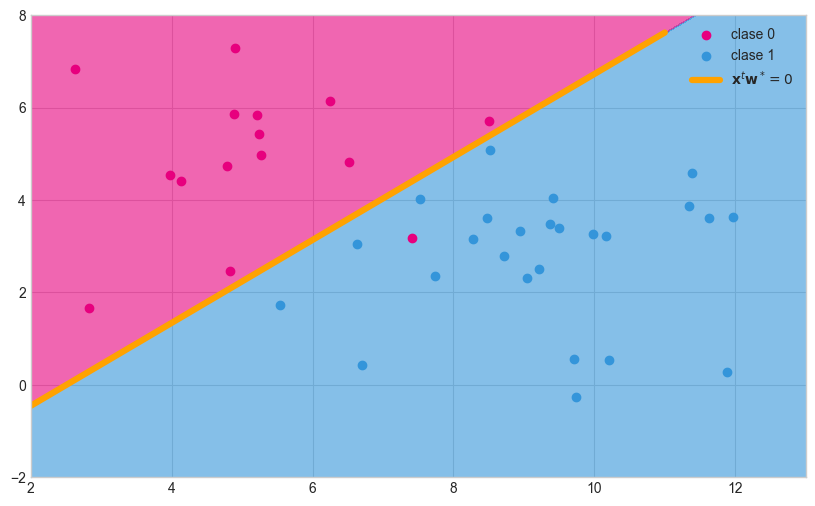

In [26]:
"""
Grafica 3

"""

plot_grafica2(coor_x0, coor_y0, coor_x1, coor_y1, w_TR)

Notemos que, aunque  `w_GN` y `w_TN` son puntos diferentes, la "grafica 2" y la "grafica 3"
evidencian el buen desempeño de la función $g$ a la hora de clasificar los puntos en el espacio

### **Gauss-Newton vs Región de confianza**

En siguiente grafica se compara el valor de la gradiente de $f$ y el valor de $f$ en cada interación del metódo de Gauss-Newton en azul, y el método 
de región de confianza en naranjado. Se evidencia graficamente que el método de Gauss-Newton es mucho mas rápido y eficiente que el método de la región de confianza.


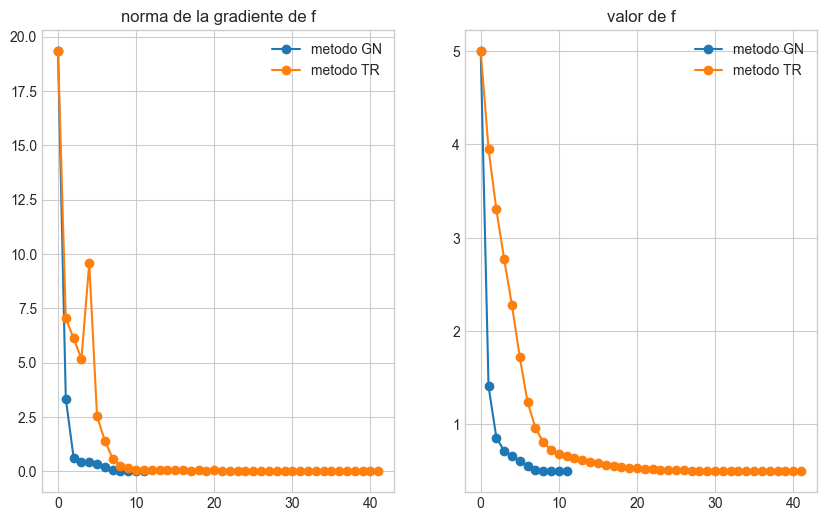

In [27]:
"""
Grafica 4

"""

def grafica_4(z1, z2, y1, y2):

    fig, (ax0, ax1) = plt.subplots(ncols=2,  figsize=(10, 6))
    x1 = [i for i in range(len(z1))]
    x2 = [i for i in range(len(z2))]
    
    ax0.plot(x1, z1, '-o', label='metodo GN')
    ax0.plot(x2, z2, '-o', label='metodo TR')
    ax0.set_title("norma de la gradiente de f")
    ax0.legend()

    ax1.plot(x1, y1, '-o', label='metodo GN')
    ax1.plot(x2, y2, '-o', label='metodo TR')
    ax1.set_title("valor de f")
    ax1.legend()

    
    plt.show()

grafica_4(z1=GN_matriz[:,3], z2=TR_matriz[:,3], y1=GN_matriz[:,4], y2=TR_matriz[:,4])